# Raytracing analyses on a Double Gauss lens

This example shows how to determine, perform and subsequently plot single ray traces and ray fan analyses in a Double Gauss lens. The code depends on the example file _"Double Gauss 28 degree field.zmx"_, which is provided by OpticStudio. Visualisations are created with Seaborn.

## Included functionalities

* _Sequential mode_:
  - Usage of `zospy.analyses.raysandspots.SingleRayTrace` to perform a single ray trace.
  - Usage of `zospy.analyses.raysandspots.RayFan` to perfrom a ray fan analysis.

## Warranty and liability

The examples are provided 'as is'. There is no warranty and rights cannot be derived from them, as is also stated in the general license of this repository.

## Import dependencies

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import zospy as zp

Input variables

In [2]:
# Number of rays per field
number_of_rays = 3

# Field coordinates, as angles w.r.t. the entrance pupil
fields = [0, 10 / 14, 1]

# Plot colors for fields and wavelengths
colors = ["b", "g", "r"]

Connect to OpticStudio in standalone mode. Analyses in standalone mode are significantly faster than in extension mode, because the user interface does not need to be updated.

In [3]:
zos = zp.ZOS()
oss = zos.connect(mode="standalone")

Load the `Double Gauss 28 degree field.zmx` example file provided by OpticStudio.

In [4]:
system_file = Path(zos.Application.SamplesDir) / "Sequential/Objectives/Double Gauss 28 degree field.zmx"
oss.load(system_file)

## Single raytrace analysis

Perform a single raytrace analysis for every field and plot the results.

D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")


D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")


D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")


D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")
D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")


D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")
D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")


D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")
D:\code\zemax\zospy\zospy\analyses\raysandspots\single_ray_trace.py:36: UserWarning: Header and row length mismatch. Empty columns will be filled with NaN.
  warn("Header and row length mismatch. Empty columns will be filled with NaN.")


Text(0.5, 1.0, 'Double Gauss 28 degree field')

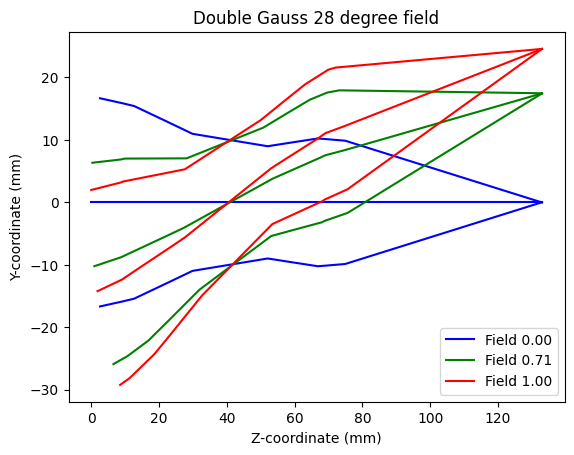

In [5]:
# Loop through field coordinates
for i, hy in enumerate(fields):
    # Loop through pupil coordinates
    for py in np.linspace(-1, 1, number_of_rays):
        # Run single ray trace
        raytrace_result = zp.analyses.raysandspots.SingleRayTrace(
            hy=hy, py=py, wavelength=2, global_coordinates=True, field=0
        ).run(oss)

        # Extract real ray data
        rays = raytrace_result.data.real_ray_trace_data

        sns.lineplot(
            rays,
            x="Z-coordinate",
            y="Y-coordinate",
            color=colors[i],
            label=f"Field {hy:.2f}" if py == -1 else None,
        )

plt.legend()
plt.xlabel("Z-coordinate (mm)")
plt.ylabel("Y-coordinate (mm)")
plt.title("Double Gauss 28 degree field")

## Ray fan analysis

Run a ray fan analysis and plot the results.

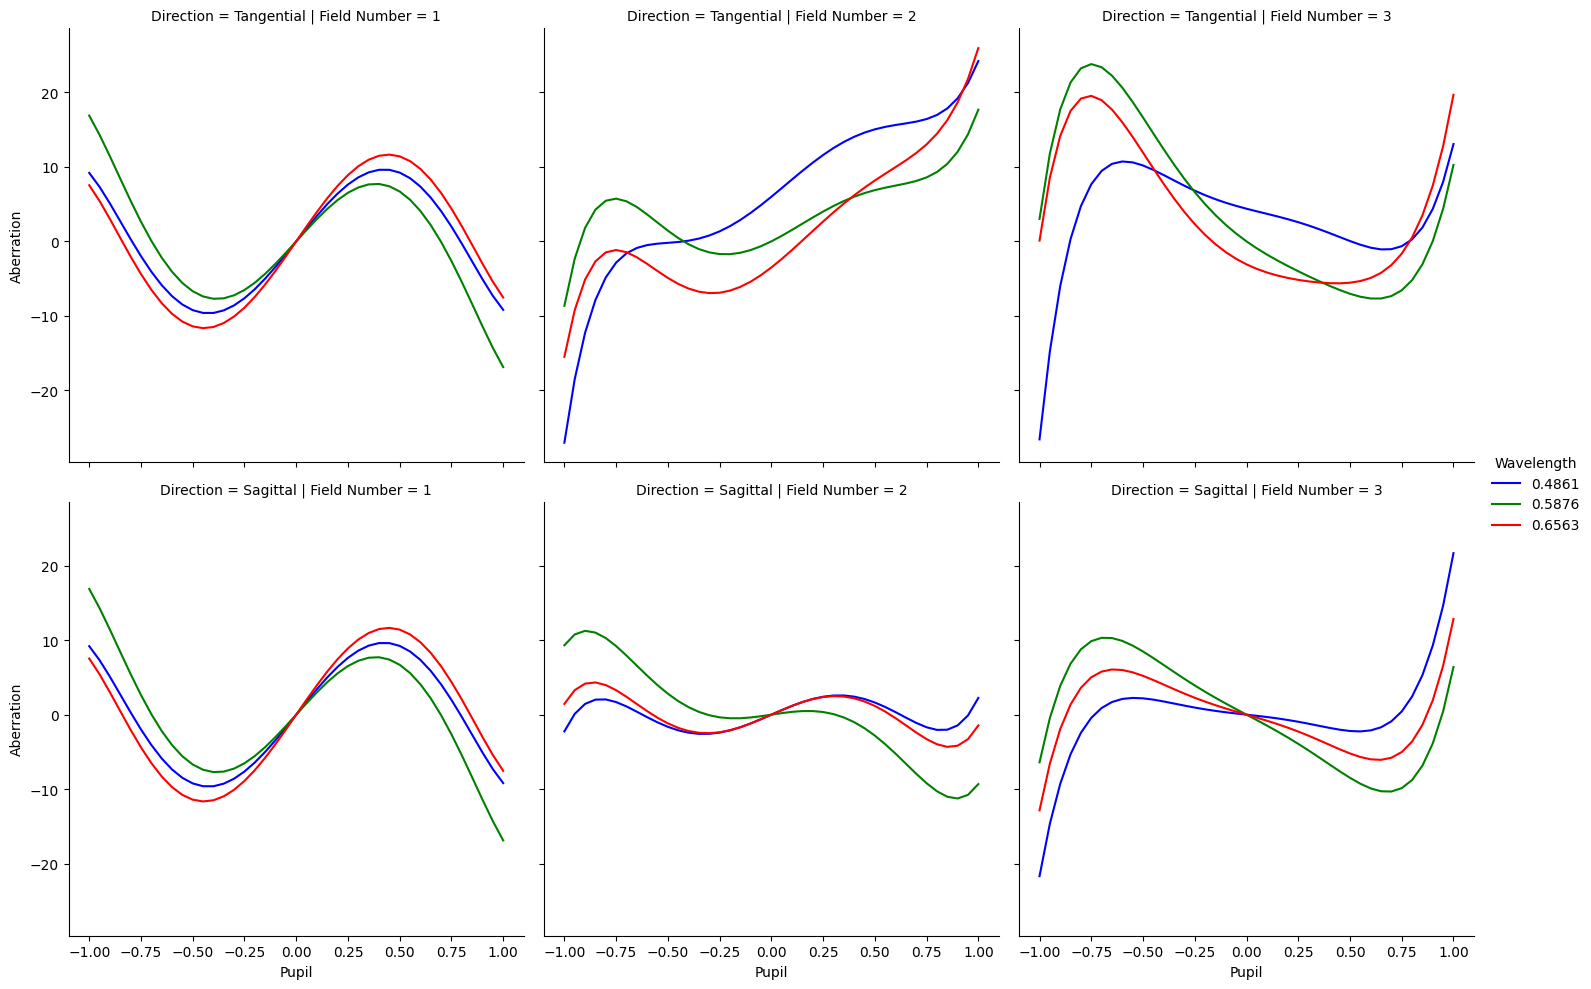

In [6]:
ray_fan_result = zp.analyses.raysandspots.RayFan(number_of_rays=20, wavelength="All", field="All").run(oss)

sns.relplot(
    ray_fan_result.data.to_dataframe(),
    x="Pupil",
    y="Aberration",
    row="Direction",
    col="Field Number",
    hue="Wavelength",
    kind="line",
    palette=colors,
)